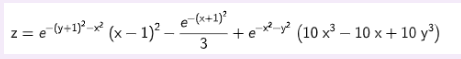

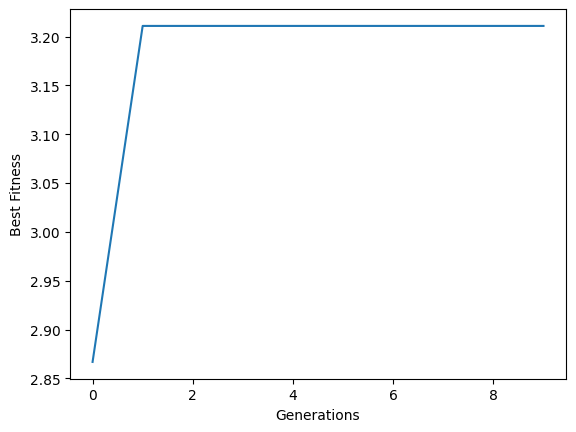

Generación 0: El Mejor (-0.1872243667811535, 0.6670563156402496), aptitud: 2.8668320005245738
Generación 1: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 2: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 3: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 4: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 5: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 6: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 7: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 8: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Generación 9: El Mejor (-0.39917263569985817, 0.025242182078657915), aptitud: 3.2109153211123287
Mejor individuo: (-0.399172635699

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(0)

# Definir los límites del espacio de búsqueda
x_min, x_max = -4, 4
y_min, y_max = -4, 4

# Definir la función de aptitud
def fitness(x, y):
    return (np.exp(-(y + 1)**2 - x**2)) * ((x - 1)**2) - ((np.exp(-(x + 1)**2))/3) + (np.exp(-x**2 - y**2)) * (10*x**3 - 10*x + 10*y**3)

# Generar un individuo aleatorio dentro del espacio de búsqueda
def generate_individual():
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    return x, y

# Generar una población inicial de individuos aleatorios
def generate_population(size):
    return [generate_individual() for _ in range(size)]

# Operación de cruce (cruza promedio)
def crossover(parent1, parent2):
    x1, y1 = parent1
    x2, y2 = parent2
    x = (x1 + x2) / 2
    y = (y1 + y2) / 2
    return x, y

# Operación de mutación (mutación uniforme)
def mutate(individual, mutation_rate):
    x, y = individual
    if random.random() < mutation_rate:
        x += random.uniform(-1, 1)
        y += random.uniform(-1, 1)
    # Asegurarse de que el individuo permanezca dentro del espacio de búsqueda
    x = max(min(x, x_max), x_min)
    y = max(min(y, y_max), y_min)
    return x, y

# Método de selección por ruleta
def roulette_selection(population, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected_index = random.choices(range(len(population)), weights=probabilities)[0]
    return population[selected_index]

# Función principal del algoritmo genético
def genetic_algorithm(population_size, generations, crossover_rate, mutation_rate):
    # Generar población inicial
    population = generate_population(population_size)
    best_solution = None
    best_fitness = float('-inf')

    # Variables para almacenar los mejores individuos de cada generación
    best_individuals = []
    best_fitnesses = []

    for i in range(generations):
        # Calcular el valor de aptitud para cada individuo en la población
        fitness_values = [fitness(x, y) for x, y in population]

        # Guardar el mejor individuo de esta generación
        generation_best_index = fitness_values.index(max(fitness_values)) # Índice del mejor individuo
        generation_best = population[generation_best_index] # Mejor individuo
        generation_best_fitness = fitness_values[generation_best_index] # Aptitud del mejor individuo

        if generation_best_fitness > best_fitness: # Si el mejor individuo de esta generación es mejor que el mejor individuo global
            best_solution = generation_best # Actualizar el mejor individuo global
            best_fitness = generation_best_fitness # Actualizar la aptitud del mejor individuo global

        best_individuals.append(generation_best) # Guardar el mejor individuo de esta generación
        best_fitnesses.append(generation_best_fitness) # Guardar la aptitud del mejor individuo de esta generación

        # Generar la siguiente generación
        new_population = []
        # en el siguiente bucle se generan los individuos de la nueva población.
        while len(new_population) < population_size: # Mientras no se haya generado la población completa
            # Selección de dos padres usando el método de la ruleta
            parent1 = roulette_selection(population, fitness_values)   # Seleccionar el primer padre
            parent2 = roulette_selection(population, fitness_values) # Seleccionar el segundo padre

            # Operación de cruce
            if random.random() < crossover_rate: # random.random() genera un número aleatorio entre 0 y 1, si es menor que crossover_rate se realiza el cruce
                child = crossover(parent1, parent2) # Generar un hijo usando el método de cruce
            else:
                child = parent1 # Si no se realiza el cruce, el hijo es una copia del primer padre

            # Operación de mutación
            child = mutate(child, mutation_rate) # Mutar el hijo generado

            new_population.append(child) # Agregar el hijo a la nueva población

        population = new_population

    # Graficar la evolución de la mejor aptitud
    plt.plot(best_fitnesses)

    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.show()

    #se retornan a los mejores individuos de cada generación
    best_ones ={}
    for i in range(len(best_individuals)):
        print(f"Generación {i}: El Mejor {best_individuals[i]}, aptitud: {best_fitnesses[i]}")
        best_ones[i] = (best_individuals[i], best_fitnesses[i])
    return best_solution,best_ones

# Solicitar los parámetros al usuario
population_size = 10 
generations = 10
crossover_rate = .8
mutation_rate = .001

# Ejecutar el algoritmo genético
best_indivuals = genetic_algorithm(population_size, generations, crossover_rate, mutation_rate)
print(f"Mejor individuo: {best_indivuals[0]}")


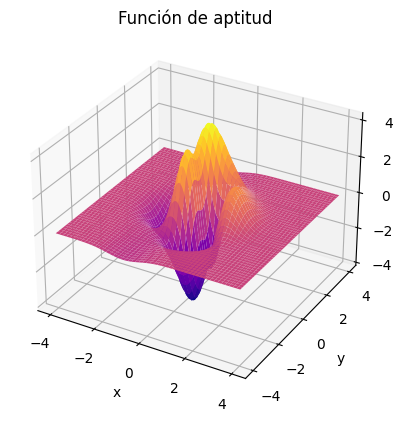

In [52]:
import matplotlib.pyplot as plt


# Generar datos para la gráfica
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
Z = fitness(X, Y)


# Graficar la función
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_title('Función de aptitud')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()